Numerical exercise #1 from Telescopes

Calculate the ideal point spread function for a Cassegraine-type design with 4 struts to hold the secondary creating an extra obstruction. Compare to an actual color image from the Hubble Space Telescope and comment on where the diffraction-related features in that image come from.

A Cassegraine telescope has a concave parabaloid primary mirror and a convex hyperbolic secondary mirror. The resulting aperture is a "donut" shape with 4 struts holding up the secondary mirror. In the below image, 3 circles are the pads securing the primary mirror on the Hubble Space Telescope (HST). In the following exercise we will neglect these pads.

![title](HSP_E2.png)

Source: https://www.stsci.edu/files/live/sites/www/files/home/hst/instrumentation/focus-and-pointing/documentation/_documents/krist_tinytim_spie.pdf

To get the point spread function (PSF), we need to take the squared modulus of the Fourier transform of the aperture. The aperature function is the following on a grid centered about $(x,y) = (0,0)$:

$f(x,y) = 0$ if $x^2+y^2>R^2$ OR $y = x$ OR $y = -x$

$f(x,y) = 1$ otherwise.


Note that in the following calculations I am completely ignoring units, I'm just qualitatively explaining how the aperature structure leads to diffraction-related features.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [2]:
dim = 201
R = 90
r = 28
strut_width = 5
grid = np.ones((dim,dim))
for i in range(dim):
    for j in range(dim):
        if ((i-dim/2)**2+(j-dim/2)**2)>R**2:
            grid[i,j] = 0
        if ((i-dim/2)**2+(j-dim/2)**2)<r**2:
            grid[i,j] = 0
        if np.abs(i-j)<strut_width/2:
            grid[i,j] = 0
        if np.abs(-i-j+dim)<strut_width/2:
            grid[i,j] = 0
            

Text(0.5, 1.0, 'aperature')

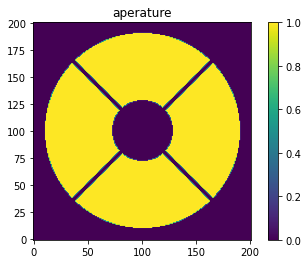

In [3]:
plt.imshow(grid, origin = 'lower', cmap = 'viridis')
plt.colorbar()
plt.title('aperature')

Now let's take the Fourier Transform of the aperature

In [4]:
grid_ft = np.fft.fft2(grid)
grid_ft = np.fft.fftshift(grid_ft)
grid_ft = np.abs(grid_ft)

Text(0.5, 1.0, 'log magnitude, FFT of aperature')

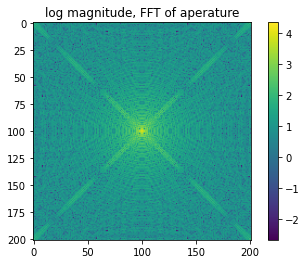

In [5]:
plt.imshow(np.log10(grid_ft))
plt.colorbar()
plt.title('log magnitude, FFT of aperature')

The PSF is the squared modulus of the FFT of the aperature:

In [6]:
psf = grid_ft**2

Text(0.5, 1.0, 'log PSF')

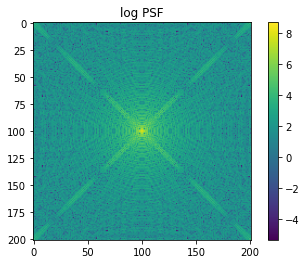

In [7]:
#zoom in on the features:
plt.imshow(np.log10(psf))
plt.colorbar()
plt.title('log PSF')

Note that analytically it's useful to compute the Fourier transform for features individually (i.e. compute the FT of a circle of light and then subtract off the FTs of the strut and secondary induvidually). Since we are taking numerical approach here, it's easier to just do the FT all at once!


Now we need to compare to an actual color image from the Hubble Space Telescope. Recall that an image is a convolution of the PSF and the light source location O(u,v):

$ I(x_i, y_i) = \int \int O(u,v)PSF(x_i/M-u, y_i/M-v) dudv$

where $M$ is the magnification of the telescope and $x_i, y_i$ are the image coordinates (source: https://en.wikipedia.org/wiki/Point_spread_function).

Let's approximate a star as a point source of light. Here I use a star radius of 3 pixels. Then all we need to do to compare to images from the HST is to convolve the object location function and the PSF.

In [8]:
star_rad = 3
grid_star = np.ones((dim,dim))
for i in range(dim):
    for j in range(dim):
        if ((i-dim/2)**2+(j-dim/2)**2)>star_rad**2:
            grid_star[i,j] = 0

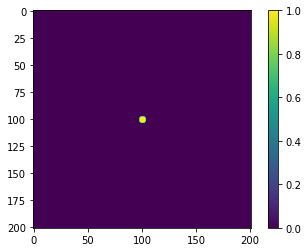

In [9]:
plt.imshow(grid_star)
plt.colorbar()

In [10]:
est_conv = convolve2d(grid_star, psf, mode='same', boundary='symm') 

Text(0.5, 1.0, 'a star seen through our synthetic telescope')

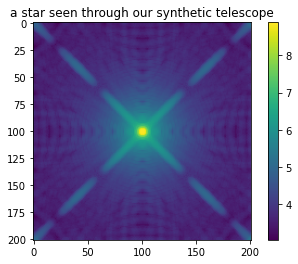

In [11]:
plt.imshow(np.log10(est_conv))
plt.colorbar()
plt.title('a star seen through our synthetic telescope')

Below is an image of proxima centauri as seen through the HST. Note that the point source "star" seen through our synthetic telescope has many of the same features: the diffraction spikes occur due to the struts obstructing some of the light. There is also some blurring of light uniformly around the point source that is observed in the HST image. This comes from the secondary occluding some of the light radiating from the star.

![title](proximacentariHST.jpg)

Source: https://esahubble.org/images/potw1343a/